<a href="https://colab.research.google.com/github/chiranjeevisairithvik/Crop-Health-Monitoring/blob/main/Crop-health-Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from PIL import Image
import IPython.display as display
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [3]:
# Function to count total files in a folder
def total_files(folder_path):
    num_files = len([f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))])
    return num_files

In [4]:
# Folders for datasets
folders = {
    'train': {
        'Healthy': "/content/drive/MyDrive/Dataset/Train/Healthy",
        'Powdery': "/content/drive/MyDrive/Dataset/Train/Powdery",
        'Rust': "/content/drive/MyDrive/Dataset/Train/Rust"
    },
    'test': {
        'Healthy': "/content/drive/MyDrive/Dataset/Test/Healthy",
        'Powdery': "/content/drive/MyDrive/Dataset/Test/Powdery",
        'Rust': "/content/drive/MyDrive/Dataset/Test/Rust"
    },
    'validation': {
        'Healthy': "/content/drive/MyDrive/Dataset/Validation/Healthy",
        'Powdery': "/content/drive/MyDrive/Dataset/Validation/Powdery",
        'Rust': "/content/drive/MyDrive/Dataset/Validation/Rust"
    }
}


In [5]:
# Display the number of files in each dataset category
for dataset_type, paths in folders.items():
    print(f"===== {dataset_type.capitalize()} Dataset =====")
    for category, path in paths.items():
        print(f"Number of {category.lower()} leaf images: {total_files(path)}")
    print("========================================================")

===== Train Dataset =====
Number of healthy leaf images: 458
Number of powdery leaf images: 430
Number of rust leaf images: 434
===== Test Dataset =====
Number of healthy leaf images: 50
Number of powdery leaf images: 50
Number of rust leaf images: 50
===== Validation Dataset =====
Number of healthy leaf images: 20
Number of powdery leaf images: 20
Number of rust leaf images: 20


In [6]:
# Function to display images from a specific path
def display_image(image_path):
    with open(image_path, 'rb') as f:
        display.display(display.Image(data=f.read(), width=500))

# Display example images

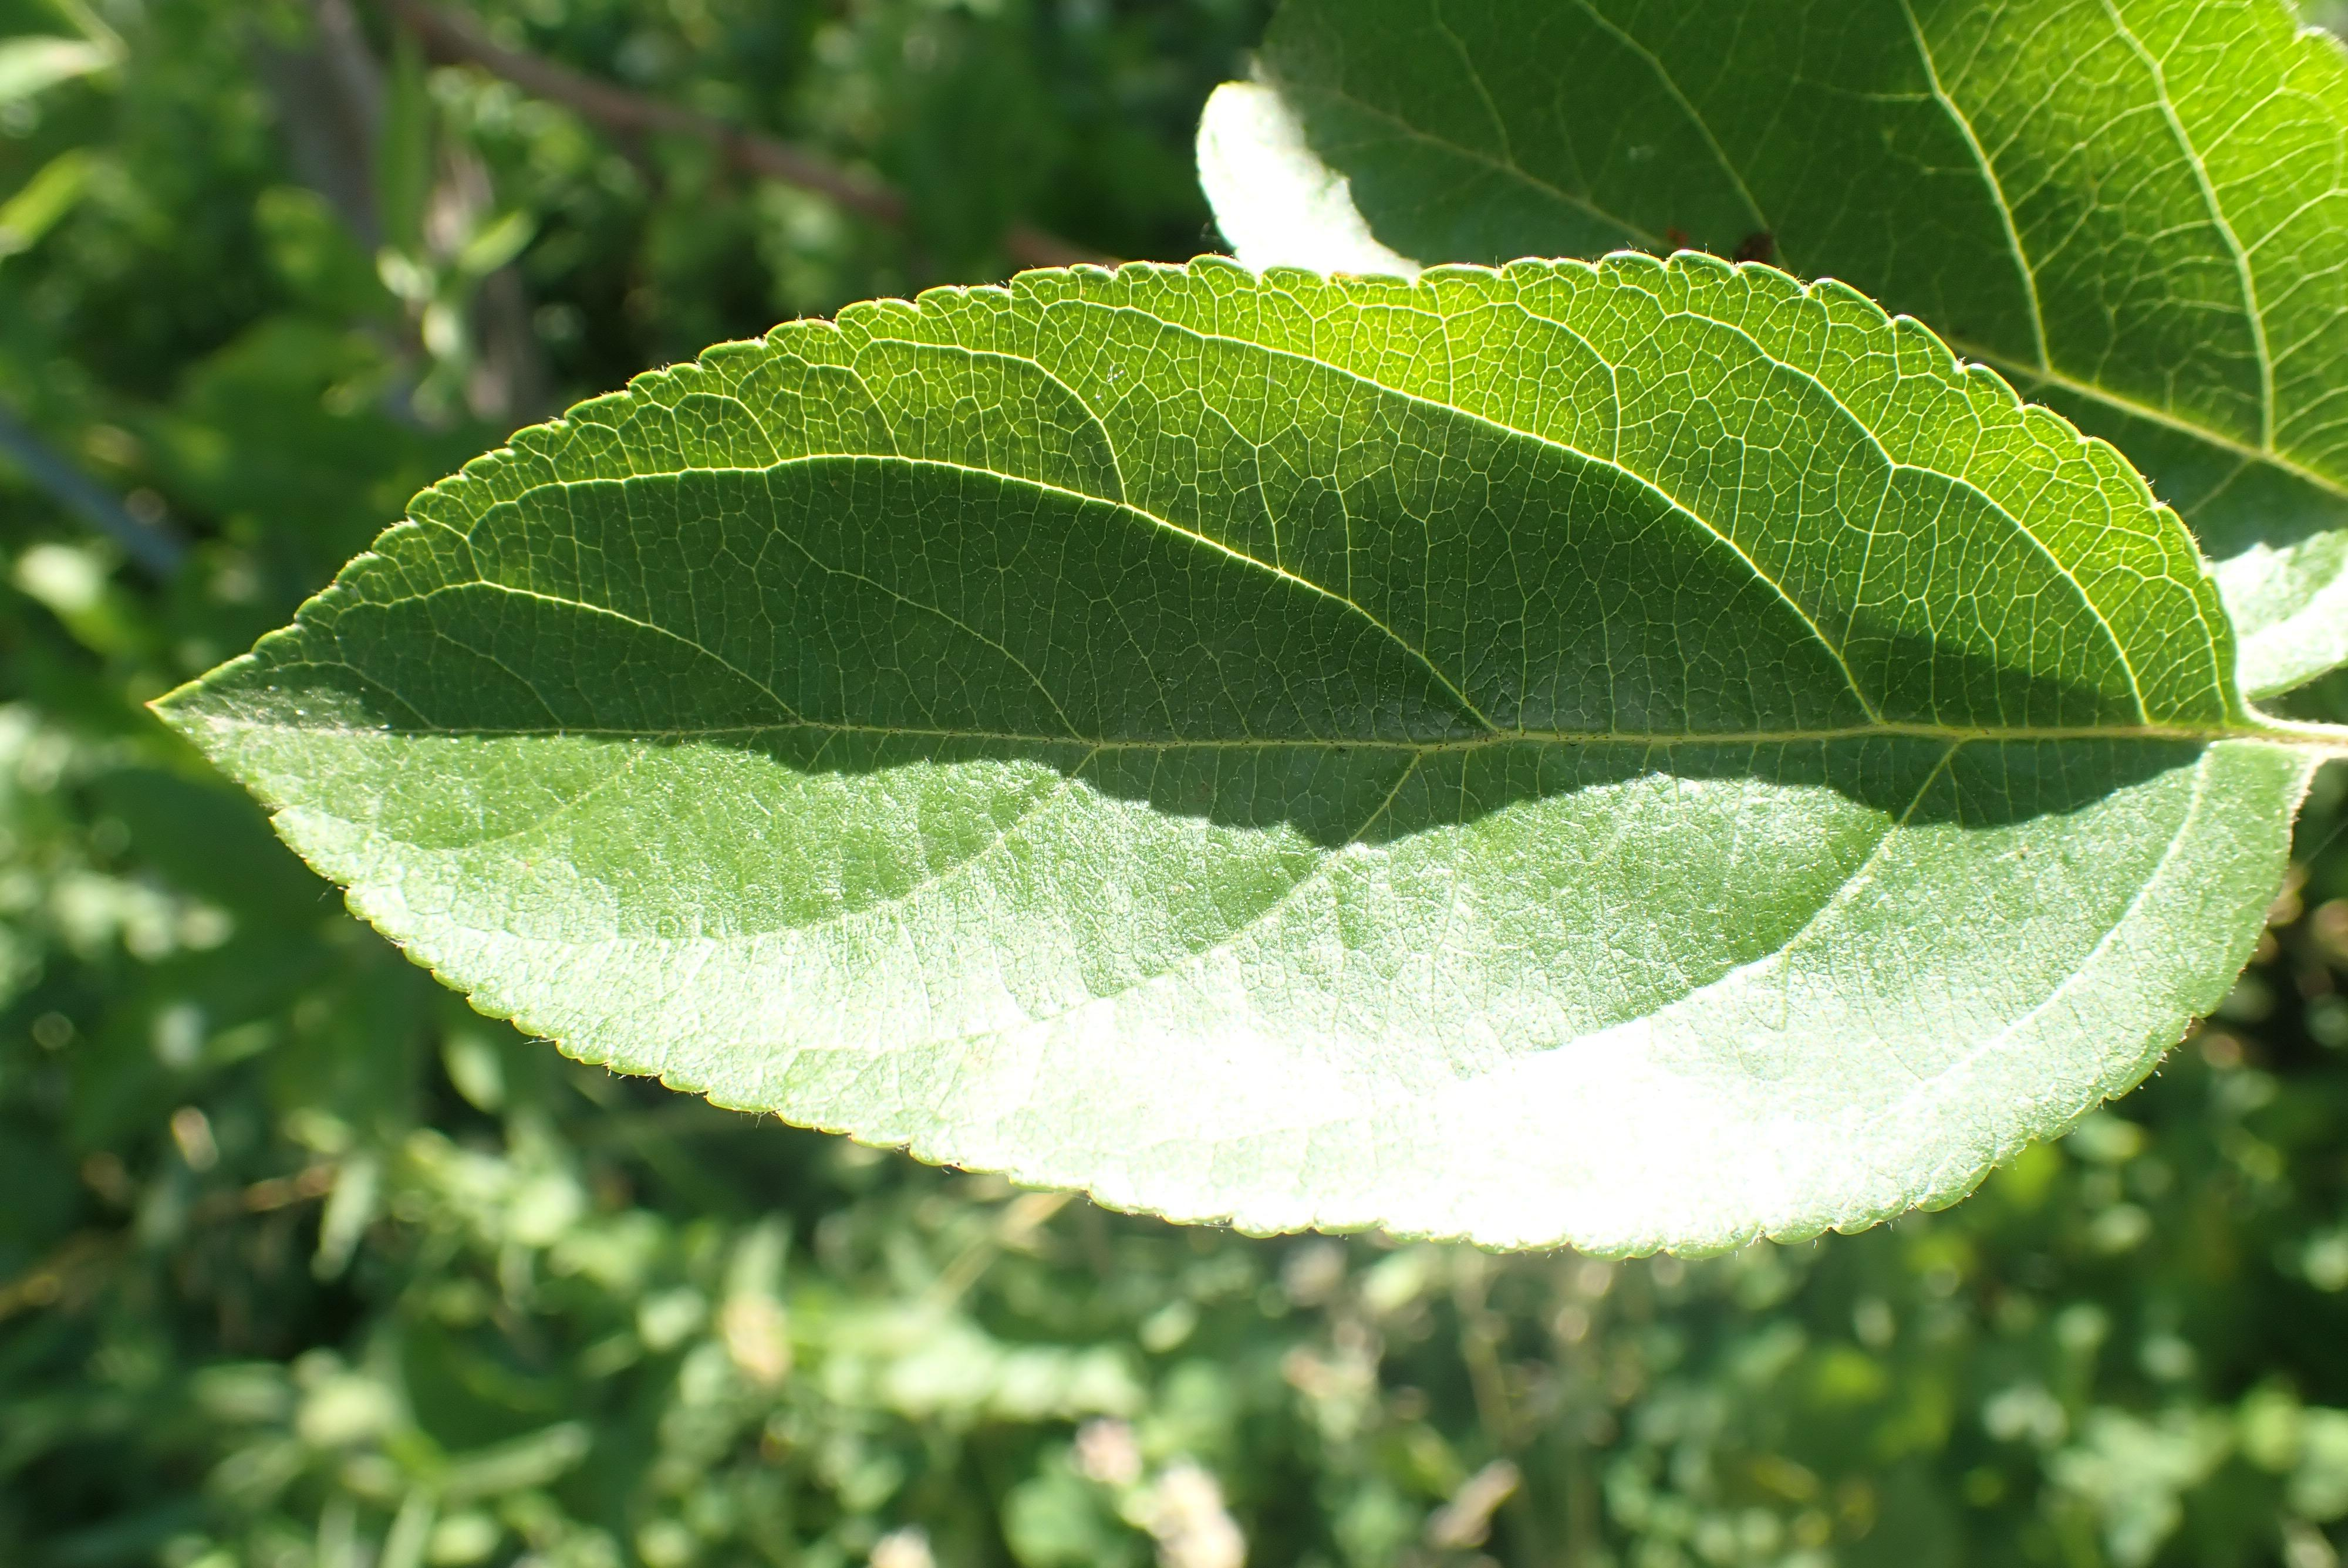

In [7]:
display_image('/content/drive/MyDrive/Dataset/Train/Healthy/802b59956a7aa5e7.jpg')

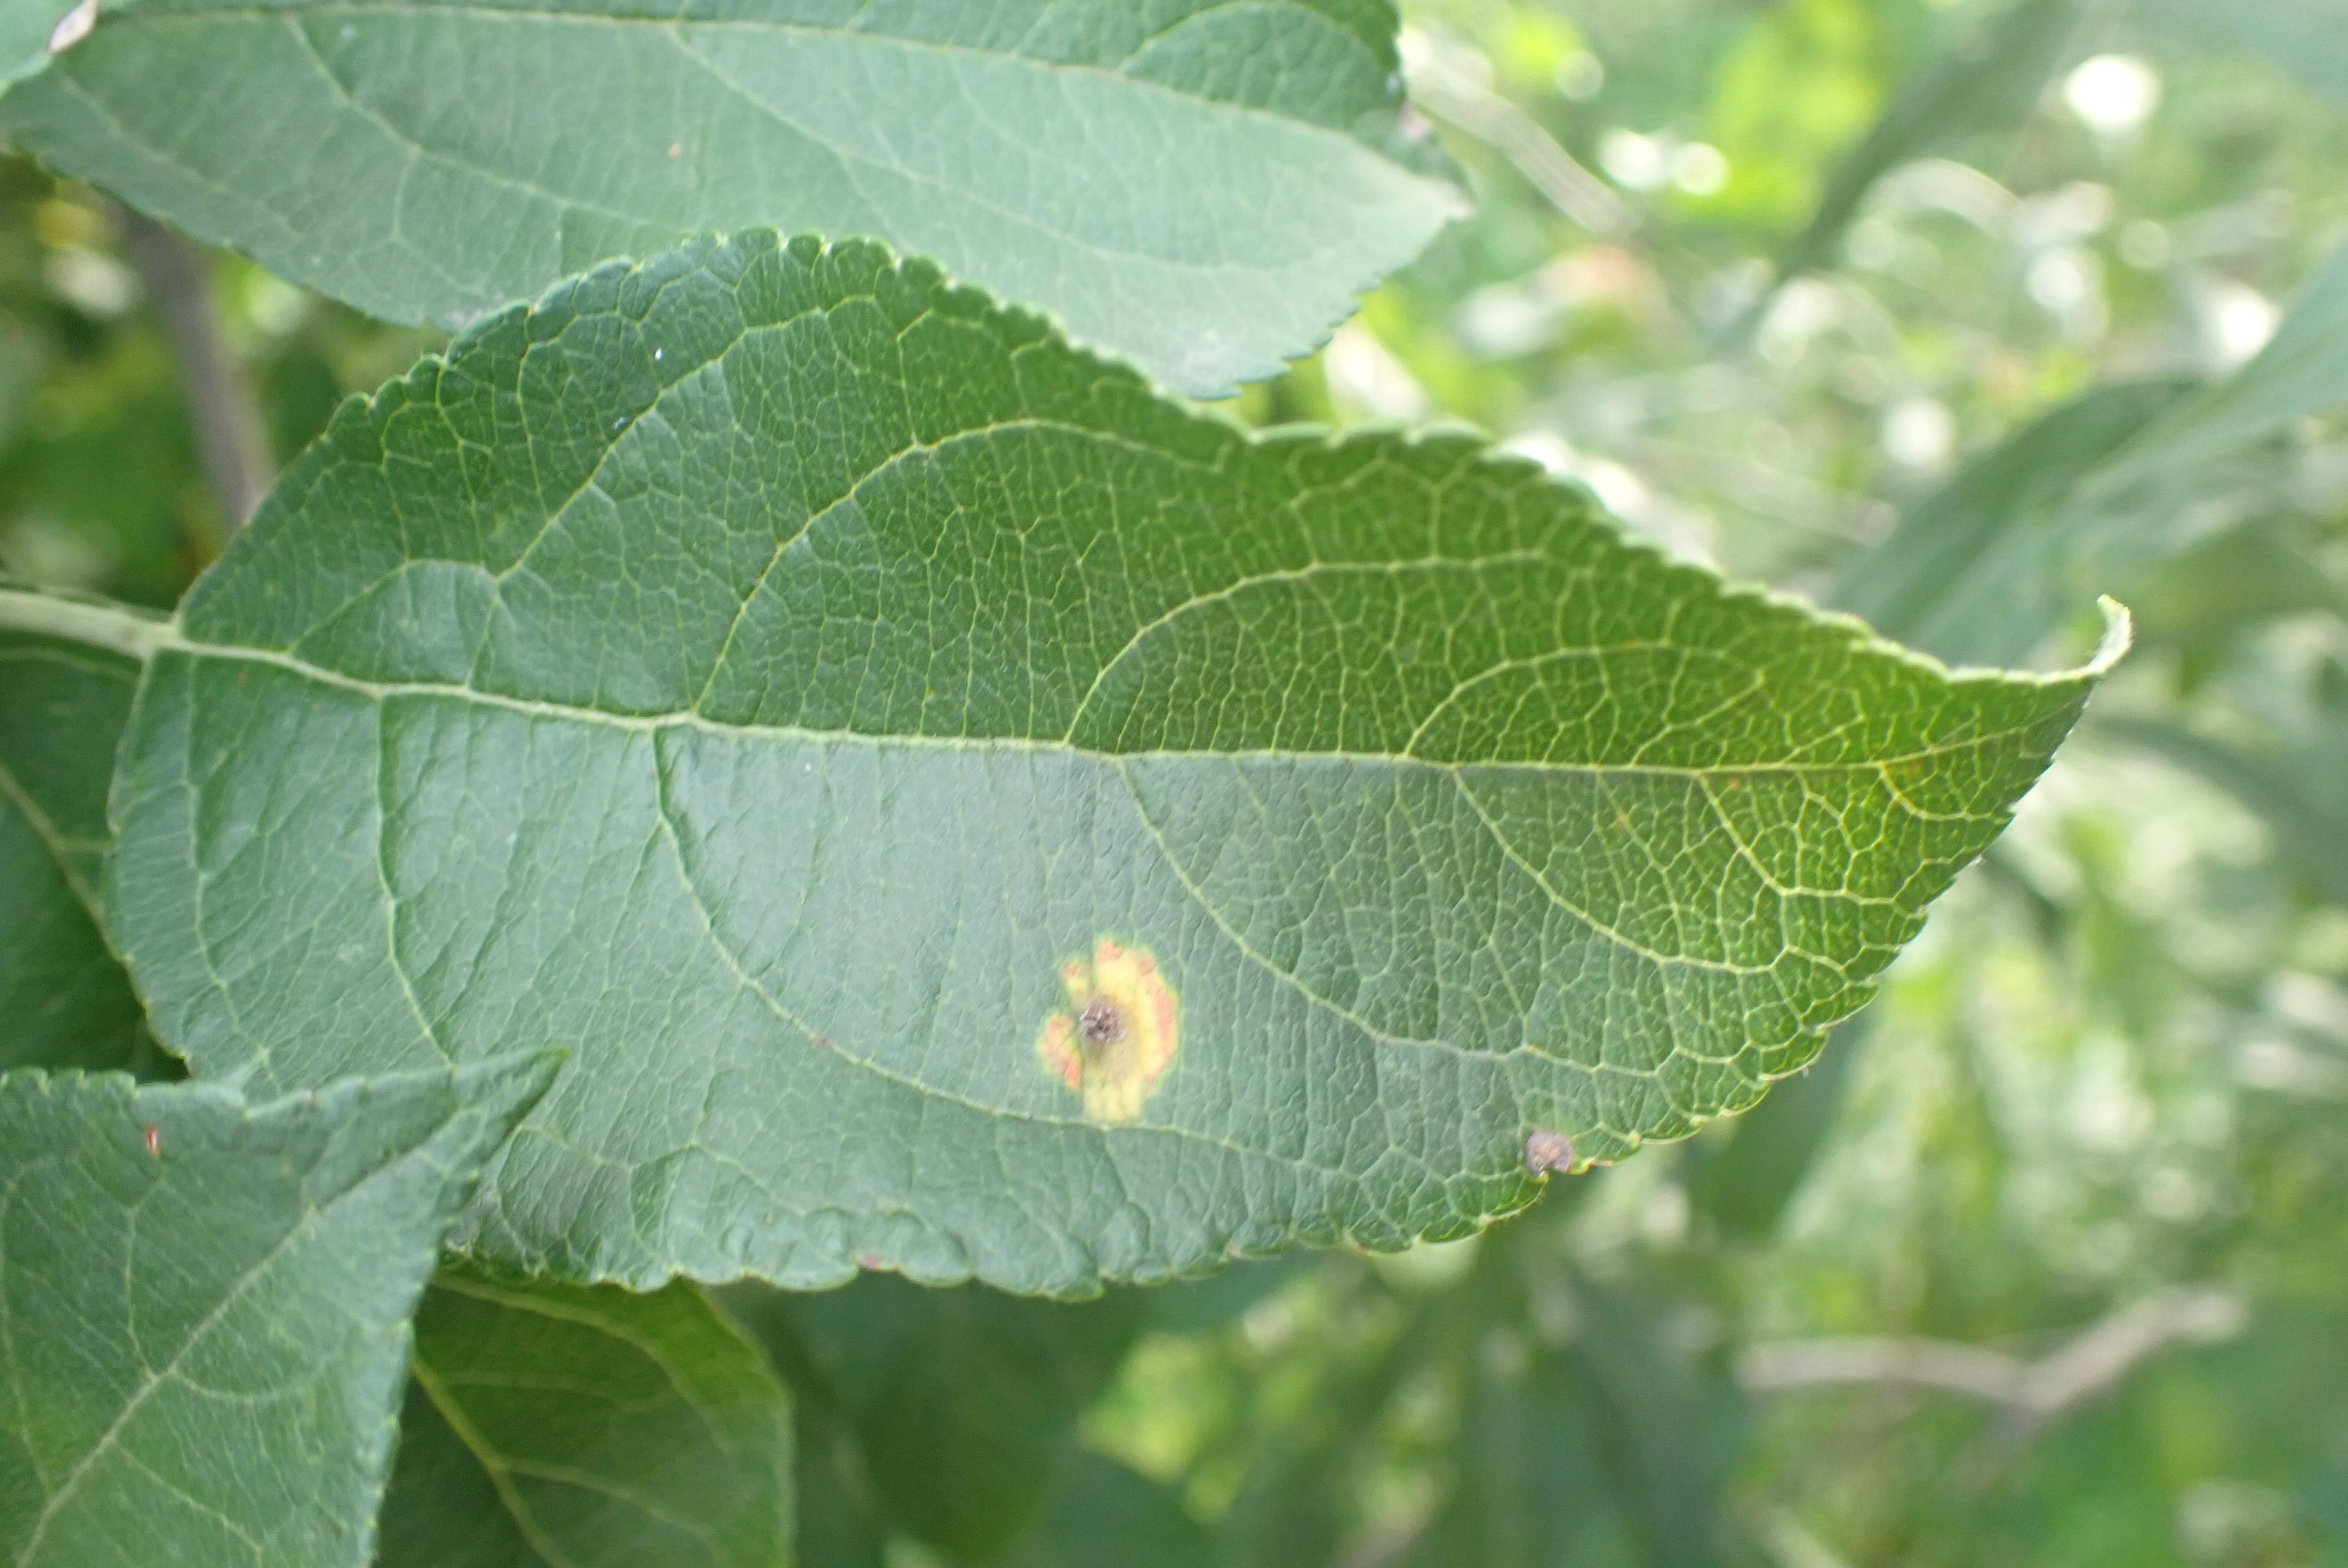

In [8]:
display_image('/content/drive/MyDrive/Dataset/Train/Rust/80933fcc6a673636.jpg')

In [9]:
# Install necessary packages
!pip install tensorflow
!pip install keras

In [10]:
# Prepare data generators
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Train',
                                                    target_size=(225, 225),
                                                    batch_size=32,
                                                    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Validation',
                                                        target_size=(225, 225),
                                                        batch_size=32,
                                                        class_mode='categorical')

Found 1322 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [11]:
# Build a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(225, 225, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Train the model
history = model.fit(train_generator,
                    batch_size=16,
                    epochs=5,
                    validation_data=validation_generator,
                    validation_batch_size=16)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


42/42 ━━━━━━━━━━━━━━━━━━━━ 682s 14s/step - accuracy: 0.4175 - loss: 1.9336 - val_accuracy: 0.6667 - val_loss: 0.7484
Epoch 2/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 249s 5s/step - accuracy: 0.7151 - loss: 0.6523 - val_accuracy: 0.7833 - val_loss: 0.5401
Epoch 3/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.8146 - loss: 0.4692 - val_accuracy: 0.8167 - val_loss: 0.5157
Epoch 4/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 231s 5s/step - accuracy: 0.9016 - loss: 0.2692 - val_accuracy: 0.8167 - val_loss: 0.5238
Epoch 5/5
42/42 ━━━━━━━━━━━━━━━━━━━━ 270s 5s/step - accuracy: 0.9123 - loss: 0.2936 - val_accuracy: 0.8333 - val_loss: 0.5376


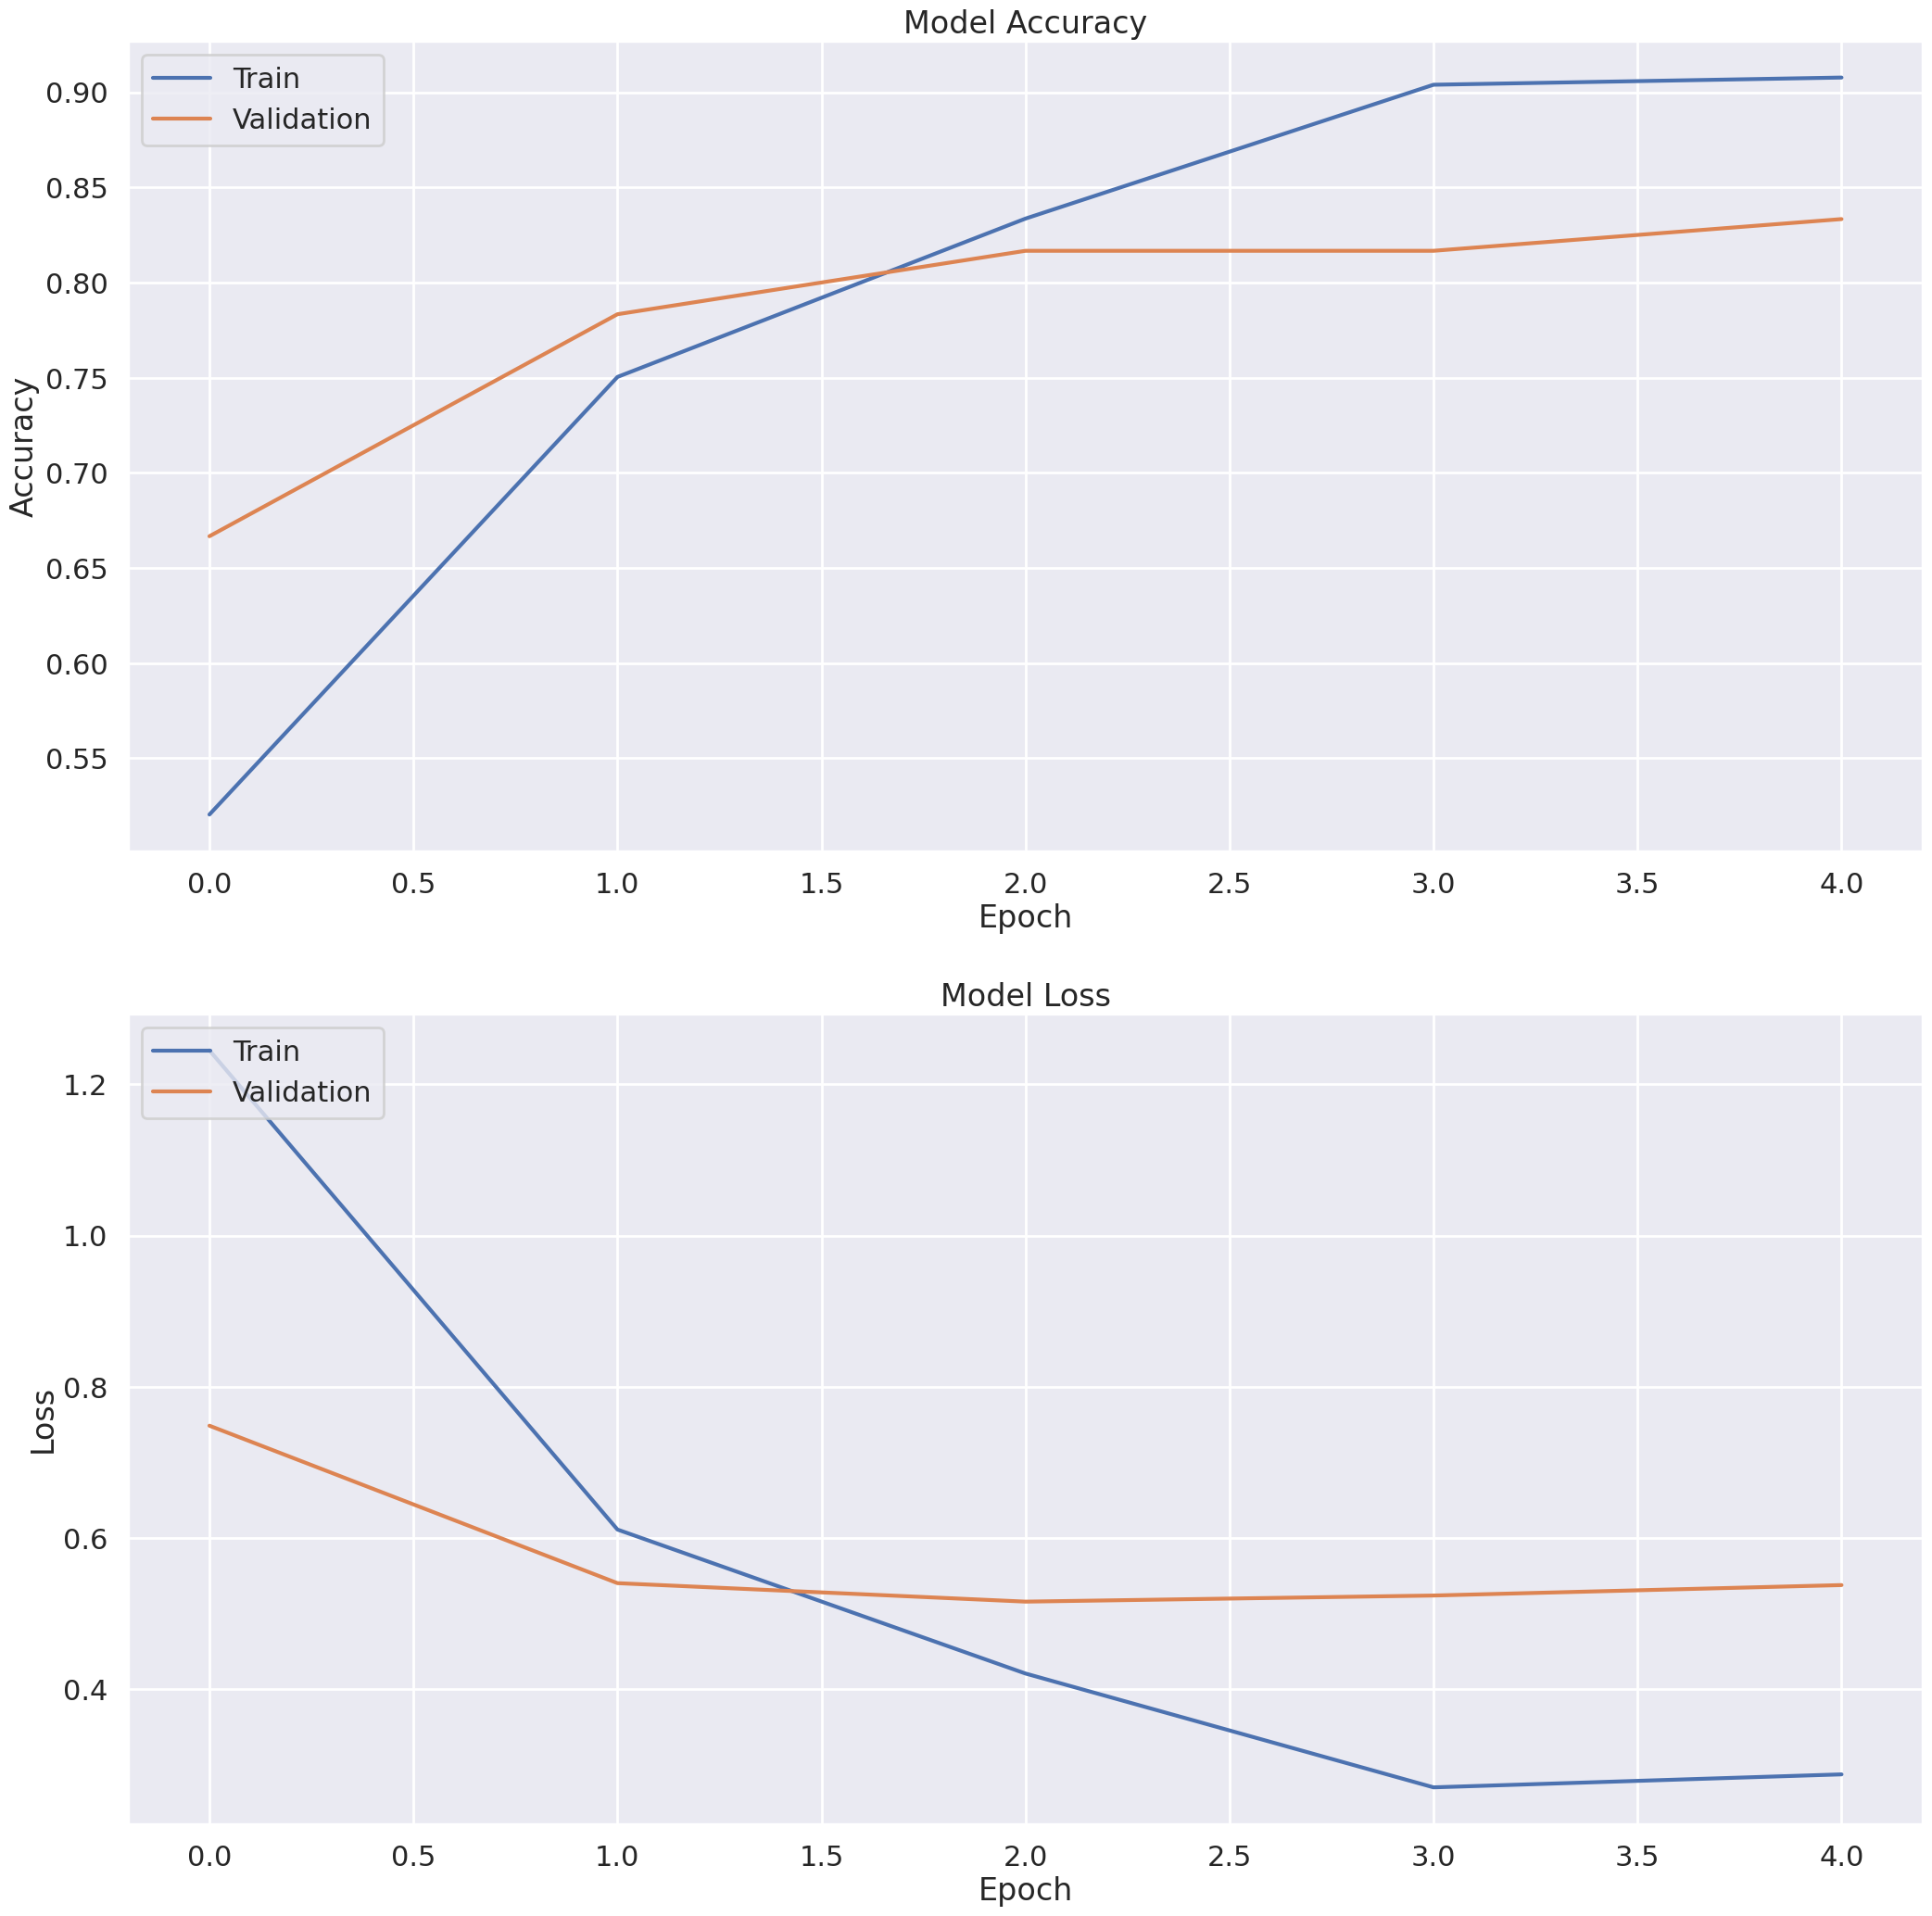

In [14]:
# Plot accuracy and loss curves
sns.set_theme()
sns.set_context("poster")
figure(figsize=(25, 25), dpi=100)

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [15]:
# Save the trained model
model.save("model.h5")

In [16]:
# Load test data
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Dataset/Test',
    target_size=(225, 225),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # important to keep labels in order for comparison
)

Found 150 images belonging to 3 classes.


5/5 ━━━━━━━━━━━━━━━━━━━━ 58s 14s/step


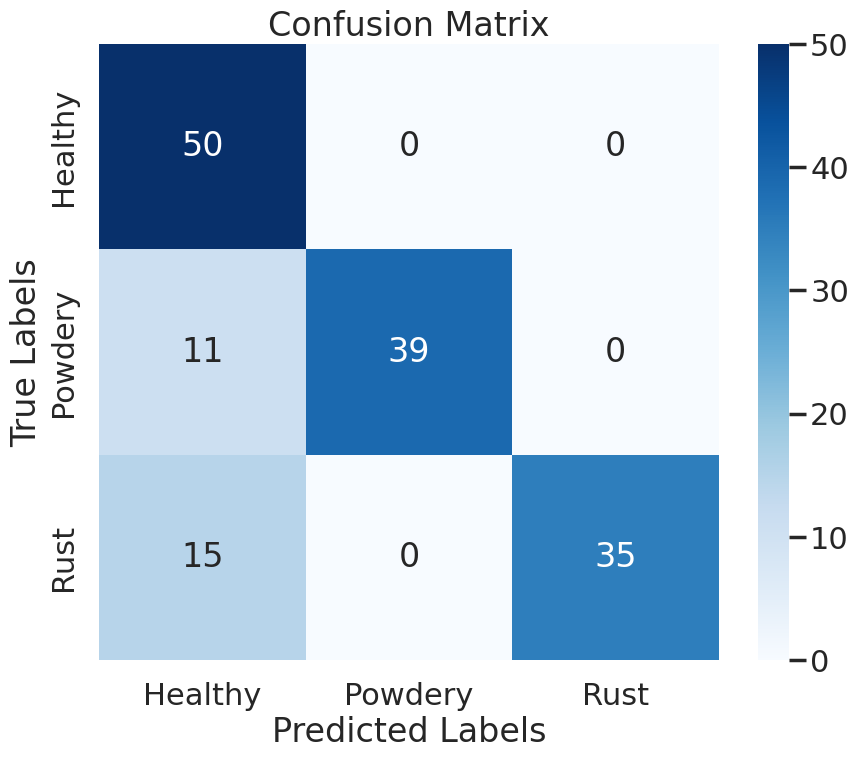

In [17]:
# Predict labels for test data
Y_pred = model.predict(test_generator, test_generator.samples // test_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
# Get true labels
y_true = test_generator.classes

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
# Plotting confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [18]:
# Print classification report
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

Classification Report
              precision    recall  f1-score   support

     Healthy       0.66      1.00      0.79        50
     Powdery       1.00      0.78      0.88        50
        Rust       1.00      0.70      0.82        50

    accuracy                           0.83       150
   macro avg       0.89      0.83      0.83       150
weighted avg       0.89      0.83      0.83       150



In [19]:
# Function to preprocess an image for prediction
def preprocess_image(image_path, target_size=(225, 225)):
    img = load_img(image_path, target_size=target_size)
    x = img_to_array(img)
    x = x.astype('float32') / 255.
    x = np.expand_dims(x, axis=0)
    return x

In [20]:
# Predict the label of an image
def predict_image(image_path):
    x = preprocess_image(image_path)
    predictions = model.predict(x)
    labels = train_generator.class_indices
    labels = {v: k for k, v in labels.items()}
    predicted_label = labels[np.argmax(predictions)]
    print(f"Predicted label: {predicted_label}")
    return predicted_label

In [21]:

# Example of prediction
predict_image('/content/drive/MyDrive/Dataset/Test/Rust/82f49a4a7b9585f1.jpg')

# Evaluate the model on the test dataset
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Test',
                                                  target_size=(225, 225),
                                                  batch_size=32,
                                                  class_mode='categorical')

test_loss, test_acc = model.evaluate(test_generator)
print(f"Test accuracy: {test_acc * 100:.2f}%")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
Predicted label: Rust
Found 150 images belonging to 3 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - accuracy: 0.8554 - loss: 0.5239
Test accuracy: 82.67%
